## Final Project Submission

* Student name: Matthew Lipman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import haversine as hs #geographic distance calculator

## Load and observe data

In [2]:
df = pd.read_csv('data/all_features_ppsqft_quant.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17495 entries, 0 to 17494
Data columns (total 28 columns):
Unnamed: 0                          17495 non-null int64
price                               17495 non-null float64
sqft_living                         17495 non-null int64
lat                                 17495 non-null float64
long                                17495 non-null float64
price_per_sqft                      17495 non-null float64
min_dist_park                       17495 non-null float64
closest_distance_to_top_school      17495 non-null float64
closest_distance_to_great_coffee    17495 non-null float64
closest_distance_to_scientology     17495 non-null float64
interaction                         17495 non-null float64
quant_sqft_living                   17495 non-null float64
quant_coffee                        17495 non-null float64
quant_parks                         17495 non-null float64
quant_schools                       17495 non-null float64
quant_scie

### Look into the data and confirm normality for modeling

Price per square foot represents a normal distribution.
Skewness: 0.3602071215862736
Kurtosis: -0.7052077098771936
n= 17495


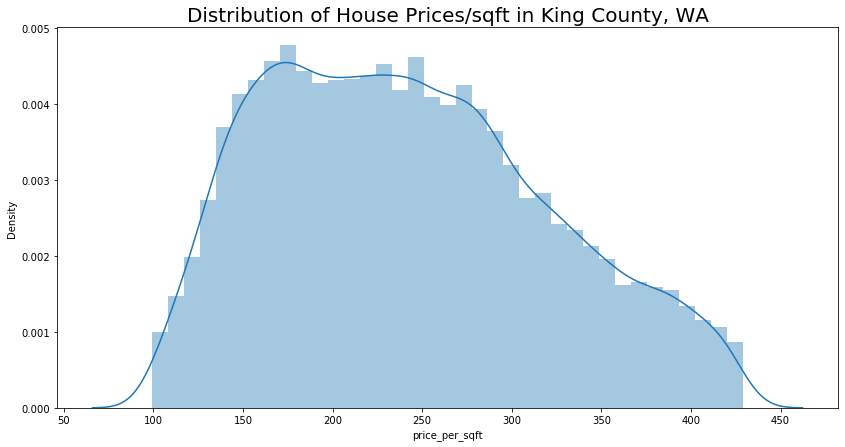

In [4]:
plt.figure(figsize=(14,7))
sns.distplot(df['price_per_sqft'])
plt.title("Distribution of House Prices/sqft in King County, WA", fontsize=20);
print("Price per square foot represents a normal distribution.")
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())
print("n=",len(df['price_per_sqft']))

> **Comment:** We had reduced all rows with prices per square foot outside 1.5x the standard deviations

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Displays a positive skewness.
Skewness: 1.9376002140371387
Kurtosis: 11.440595305150612
n= 17495


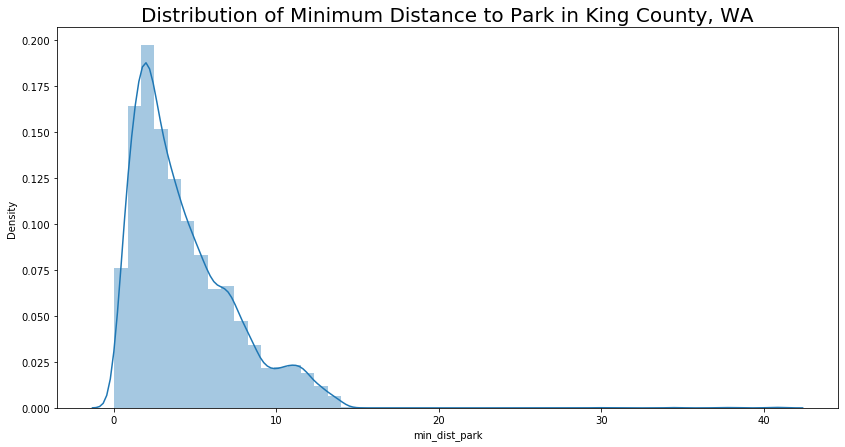

In [5]:
plt.figure(figsize=(14,7))
sns.distplot(df['min_dist_park'])
plt.title("Distribution of Minimum Distance to Park in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Displays a positive skewness.")
print("Skewness:", df['min_dist_park'].skew())
print("Kurtosis:", df['min_dist_park'].kurt())
print("n=",len(df['min_dist_park']))

> **Comment:** Will need to either remove outliers to reduce kurtosis or conduct a transformation of data to spread out the peak.

Distribution appears to be trimodal.
Skewness: 0.6667217435869717
Kurtosis: 0.7472865498443166
n= 17495


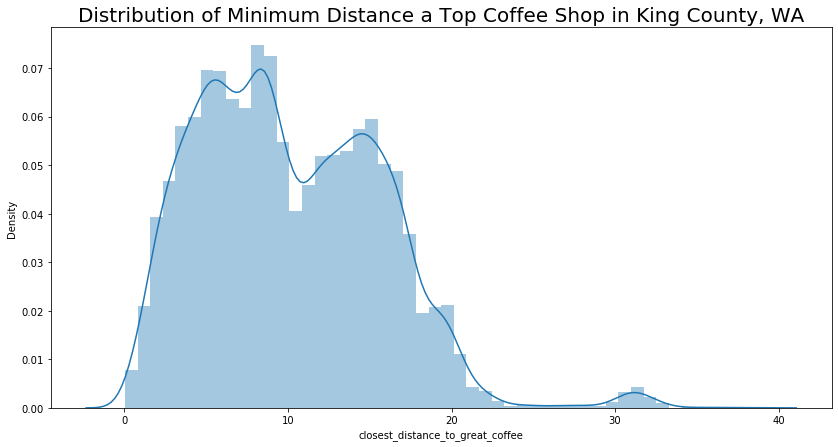

In [6]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_great_coffee'])
plt.title("Distribution of Minimum Distance a Top Coffee Shop in King County, WA", fontsize=20);
print("Distribution appears to be trimodal.")
print("Skewness:", df['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df['closest_distance_to_great_coffee'].kurt())
print("n=",len(df['closest_distance_to_great_coffee']))

> **Comment:** Will need to conduct a transformation of some sort to convert to unimodal.

Distribution appears to be trimodal and contain high level of tails.
Skewness: 0.7838143243623013
Kurtosis: 0.19909190269874388
n= 17495


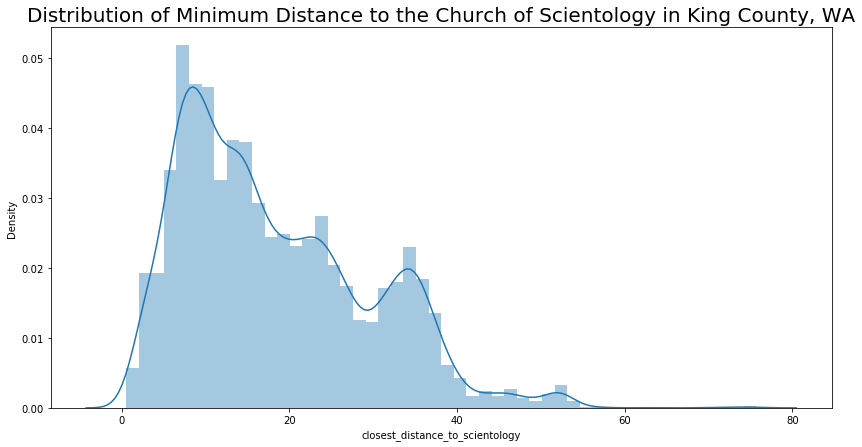

In [7]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_scientology'])
plt.title("Distribution of Minimum Distance to the Church of Scientology in King County, WA", fontsize=20);
print("Distribution appears to be trimodal and contain high level of tails.")
print("Skewness:", df['closest_distance_to_scientology'].skew())
print("Kurtosis:", df['closest_distance_to_scientology'].kurt())
print("n=",len(df['closest_distance_to_scientology']))

> **Comment:** Will need to conduct a transformation of some sort to convert to unimodal. Additionally, could remove outliers to reduce the upper tails.

Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.
Skewness: 2.1535982084843326
Kurtosis: 5.230624673347833
n= 17495


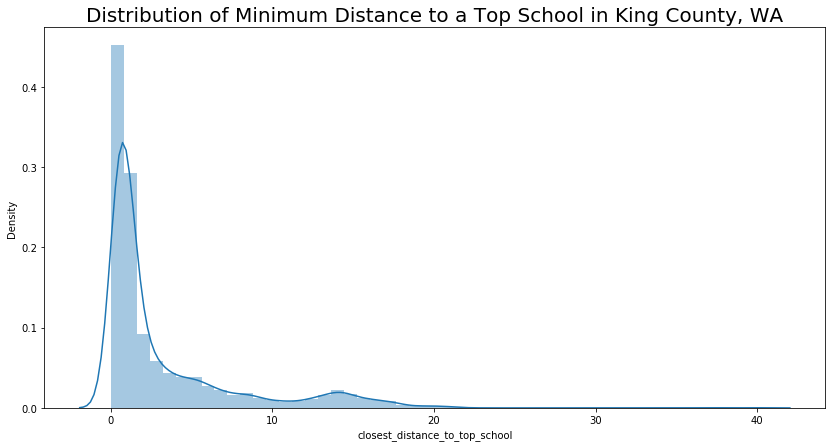

In [8]:
plt.figure(figsize=(14,7))
sns.distplot(df['closest_distance_to_top_school'])
plt.title("Distribution of Minimum Distance to a Top School in King County, WA", fontsize=20);
print("Distribution appears to deviate from a normal distribution. And display an incredibly high level of of tails.")
print("Skewness:", df['closest_distance_to_top_school'].skew())
print("Kurtosis:", df['closest_distance_to_top_school'].kurt())
print("n=",len(df['closest_distance_to_top_school']))

> **Comment:** Will need to remove outliers to reduce kurtosis. Additionally, there appears to be a second peak in between 10km and 20km, which a transformation can hopefully address.